In [1]:
# Policy visualizataon with simulated flow??
import matplotlib.pyplot as plt
import numpy as np
import util5 as u5
import gym
import seaborn as sns

pookie
pookpook5, debuggered - higher per-step rewards
oogabooga 3.3 pickle


In [2]:
results_small_gamma = np.load('results_small_gamma.npy').item()
results_large_gamma = np.load('results_large_gamma.npy').item()
results_complex_gamma = np.load('results_complex_gamma.npy').item()

In [3]:
# Test policies using the found-policies for gamma = 0.9, alpha = 0.8, and epsilon = 0.1
pi_small = results_small_gamma['output'][8][0]
pi_large = results_large_gamma['output'][8][0]
pi_complex = results_complex_gamma['output'][8][0]

In [4]:
def get_set_of_actions(just_policy, env, max_steps=2000):
    curr_state = env.reset()
    counter = 0
    reward = None

    path_list_row = []
    path_list_col = []
    reward_list = []

    while reward != 20 and reward != 50 and counter < max_steps:
        state, reward, done, info = env.step(np.argmax(just_policy[curr_state]))
        curr_state = state
        counter += 1
        env.env.s = curr_state
        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(env.env.s)
        path_list_row.append(taxi_row)
        path_list_col.append(taxi_col)
        reward_list.append(reward)

    return path_list_row, path_list_col, reward_list

In [5]:
env = gym.make('Taxi-v2')
env2 = gym.make('TaxiLarge-v0')
env3 = gym.make('TaxiLargeComplex-v0')

In [32]:
#rows, cols, rewards = get_set_of_actions(pi_small, env, max_steps=20)

In [6]:
def add_policy_path(coords_x, coords_y, linewidth=20, alpha=0.4):
    m = len(coords_x)
    a = [0] * m
    b = [0] * m
    x = [0] * m
    y = [0] * m
    
    for i in range(m-1):
        (u1, v1) = coords_x[i], coords_y[i]
        (u2, v2) = coords_x[i+1], coords_y[i+1]
        a[i] = [u1, u2]
        b[i] = [v1, v2]
        x[i] = u1
        y[i] = v1
        #print(a[i], b[i])
    
    colors = plt.cm.jet(np.linspace(0, 1, m))
    for i in range(m):
        plt.plot(a[i], b[i], 'k-', color=colors[i], linewidth=linewidth*(i+1)/(m+1), alpha=alpha)

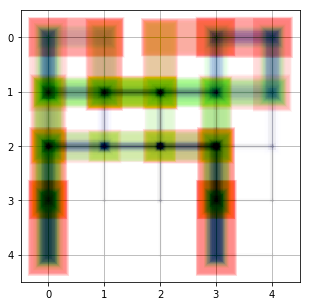

In [7]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(pi_small, env, max_steps=20)
    add_policy_path(cols, rows, linewidth=50, alpha=0.005)
plt.xlim(-0.5, 4.5)
plt.ylim(4.5, -0.5)
plt.figaspect(1)
plt.grid(True)
plt.show()

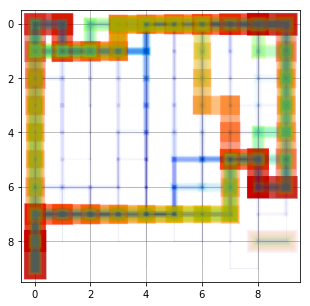

In [23]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(pi_large, env2, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()

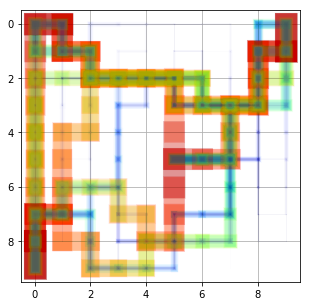

In [23]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(pi_complex, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()

In [13]:
import matplotlib.colors as colors

def add_reward_map(coords_x, coords_y, reward, gridsize=5, alpha=0.01, cmap='RdYlGn', linscale=0.03):
    m = len(coords_x)
    mesh = np.zeros((gridsize, gridsize))
    for i in range(m):
        x = coords_x[i]
        y = coords_y[i]
        mesh[x, y] = mesh[x, y]+reward[i]

    plt.imshow(mesh, cmap=cmap, alpha=alpha, norm=colors.SymLogNorm(linthresh=0.03, linscale=linscale, vmin=-1.0, vmax=1.0))
    
    return mesh

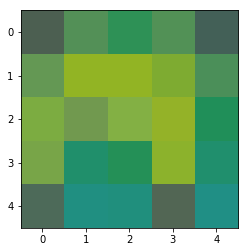

In [23]:
m = 500
for i in range(m):
    rows, cols, rewards = get_set_of_actions(pi_small, env, max_steps=40)
    add_reward_map(rows, cols, rewards, alpha=.02, cmap="viridis_r")  #hot is nice, jet is ok, inferno is ok, PiYG_r is ok
plt.xlim(-0.5, 4.5)
plt.ylim(4.5, -0.5)
plt.show()

14


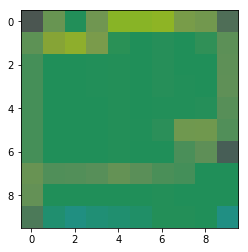

In [24]:
m = 5000
for i in range(m):
    rows, cols, rewards = get_set_of_actions(pi_large, env2, max_steps=40)
    add_reward_map(rows, cols, rewards, gridsize=10, alpha=0.02, cmap='viridis_r')
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.show()

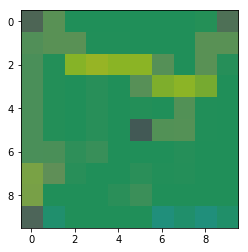

In [26]:
m = 5000
for i in range(m):
    rows, cols, rewards = get_set_of_actions(pi_complex, env3, max_steps=40)
    add_reward_map(rows, cols, rewards, gridsize=10, alpha=0.02, cmap='viridis_r')
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.show()

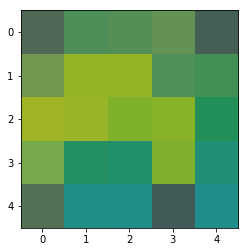

In [179]:
#meshtest:
m = 500
mesh = np.zeros((5, 5))
for i in range(m):
    rows, cols, rewards = get_set_of_actions(pi_small, env, max_steps=40)
    mesh = mesh + add_reward_map(rows, cols, rewards, alpha=.02, cmap="viridis_r")  #hot is nice, jet is ok, inferno is ok, PiYG_r is ok
plt.xlim(-0.5, 4.5)
plt.ylim(4.5, -0.5)
plt.show()

In [13]:
print('poke wait')

poke wait


In [9]:
q_pol_complex = np.load('q_pol_complex.npy')
#q_pol_complex3 = np.load('q_pol_complex3.npy')
q_pol_complex4 = np.load('q_pol_complex4.npy')

policy_complex, q_table_complex, results_complex = q_pol_complex
#policy_complex3, q_table_complex3, results_complex3 = q_pol_complex3
policy_complex4, q_table_complex4, results_complex4 = q_pol_complex4

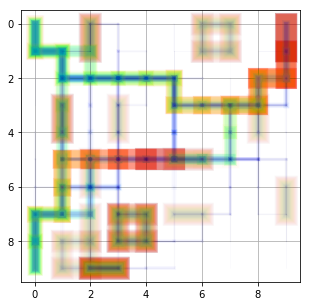

In [11]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(policy_complex4, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()



In [14]:
#print("higher per-step penalties:", u5.count(policy_complex3, env3))
print("normal penalties:", u5.count(policy_complex, env3))
print("dropoff penalties too:", u5.count(policy_complex4, env3))

normal penalties: 19
dropoff penalties too: 21


In [ ]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(policy_complex4, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()

In [20]:
policy_complex3_count = [u5.count(policy_complex3, env3) for a in range(1000)]
policy_complex_count = [u5.count(policy_complex, env3) for a in range(1000)]
policy_complex4_count = [u5.count(policy_complex4, env3) for a in range(1000)]

In [29]:
print("The optimally found policy takes an average of {} "
      "steps for the complex problem.".format(int(np.average(policy_complex3_count, weights=(np.array(policy_complex3_count)<10000)))))

print("The optimally found policy takes an average of {} "
      "steps for the complex problem.".format(int(np.average(policy_complex4_count, weights=(np.array(policy_complex4_count)<10000)))))

NameError: name 'policy_complex3_count' is not defined

In [28]:
sns.distplot(policy_complex3_count, color='blue', label='higher per-step penalty', kde=False, norm_hist=True, bins=5000)
sns.distplot(policy_complex_count, color='red', label='normal per-step penalty', kde=False, norm_hist=True, bins=5000)
sns.distplot(policy_complex4_count, color='green', label='high dropoff penalty', kde=False, norm_hist=True, bins=5000)
plt.xlim(0, 50)
plt.ylim(0, 0.04)
plt.show()

NameError: name 'policy_complex3_count' is not defined

In [30]:
q_pol_complex = np.load('q_pol_complex.npy')
q_pol_complex2 = np.load('q_pol_complex2.npy')
q_pol_complex3 = np.load('q_pol_complex3.npy')
q_pol_complex4 = np.load('q_pol_complex4.npy')
q_pol_complex5 = np.load('q_pol_complex5.npy')

policy_complex, q_table_complex, results_complex = q_pol_complex
policy_complex2, q_table_complex2, results_complex2 = q_pol_complex2
policy_complex3, q_table_complex3, results_complex3 = q_pol_complex3
policy_complex4, q_table_complex4, results_complex4 = q_pol_complex4
policy_complex5, q_table_complex5, results_complex5 = q_pol_complex

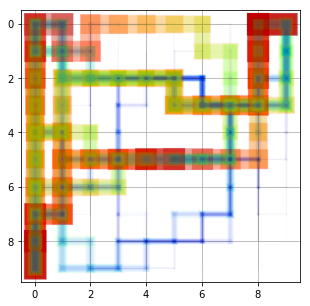

In [31]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(policy_complex, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()

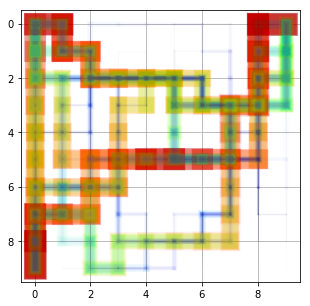

In [33]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(policy_complex2, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()

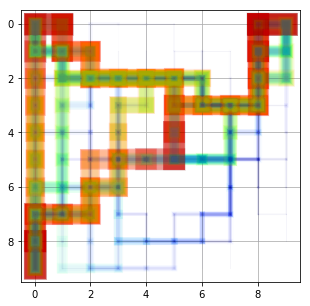

In [37]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(policy_complex3, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()

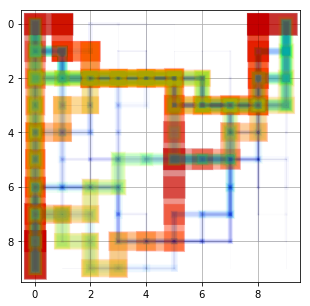

In [37]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(policy_complex4, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()

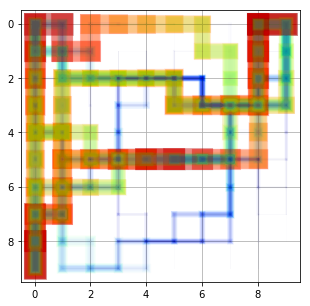

In [39]:
plt.figure(figsize=(5,5))
for i in range(500):
    rows, cols, rewards = get_set_of_actions(policy_complex5, env3, max_steps=40)
    add_policy_path(cols, rows, linewidth=25, alpha=0.01)
plt.xlim(-0.5, 9.5)
plt.ylim(9.5, -0.5)
plt.grid(True)
plt.show()